## Agrupamento aplicado aos dados de Mp2,5
### Este notebook é definido em:
* Importação das bibliotecas importantes
* Pre-Processamentos
* K-medois

In [1]:
#imports

import pandas as pd
import math
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
import random
from sklearn.cluster import KMeans 
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids



In [2]:
!pip install scikit-learn-extra

In [3]:
dados = pd.read_csv('~/Desktop/experimentos/dados_csv/mp25-2020.txt',sep='\t')

In [4]:
dados.head()

,Jan_2020,Fev_2020,Mar_2020,Abr_2020,Mai_2020,Jun_2020,Jul_2020,Ago_2020,Set_2020,Out_2020,Nov_2020,Dez_2020,cidades
0,7,6,8.0,10.0,14.0,15.0,14,12,20.0,12,8.0,7.0,S.José Campos-Jd.
1,7,6,9.0,11.0,14.0,14.0,14,13,21.0,14,8.0,7.0,Taubaté
2,9,8,10.0,13.0,16.0,15.0,17,16,26.0,17,11.0,8.0,Jundiaí
3,8,7,10.0,13.0,15.0,13.0,17,16,27.0,18,10.0,7.0,Piracicaba
4,13,12,11.0,12.5,14.0,14.0,18,22,34.0,21,12.0,8.0,Santa Gertrudes


### Pre - Processamentos
#### Os pré-processamentos adotados foram:
* Remoção da coluna 'cidade'
* Aplicação se z-score para normalização dos dados de concentração

In [5]:
dados_Limpeza=dados.copy()
dados_Limpeza.drop("cidades", axis=1, inplace=True)
std_data = StandardScaler().fit_transform(dados_Limpeza)



## Comparando K-means e K-medois
#### Foi comparado durante 100 iterações K-means e K-medois. A métrica de comparação foi o coeficente de silhueta

In [6]:

best_silhueta_score_kmeans=[]
best_silhueta_score_kmedoids=[]


for iterate in range(1,100):
    
    score_Silhueta_kmeans=[]
    score_silhueta_kmedoids=[]

    for i in range(2,20):
    
        kmeans = KMeans(n_clusters=i, algorithm = 'elkan', init='k-means++')
        
        cluster_labels =  kmeans.fit_predict(std_data)
        
        score_sillhoute = silhouette_score(std_data, cluster_labels)
        score_Silhueta_kmeans.append(score_sillhoute)
        
         # K -medoids
            
        kmedoids = KMedoids(n_clusters=i,  metric = 'l2', init = 'k-medoids++').fit(std_data)
        cluster_labels_kMedoids = kmedoids.labels_
        
        # calculate silhoeutte score
        score_sillhoute = silhouette_score(std_data, cluster_labels_kMedoids)
        score_silhueta_kmedoids.append(score_sillhoute)
    
    best_silhueta_score_kmeans.append(max(score_Silhueta_kmeans,key=float))
    best_silhueta_score_kmedoids.append(max(score_silhueta_kmedoids,key=float))
    
    
print('Maior valor de Silhueta Obtido Kmeans: ', max(best_silhueta_score_kmeans,key=float))
print('Média Kmeans: ', np.mean(best_silhueta_score_kmeans))

print('Maior valor de Silhueta Obtido K-medods: ', max(best_silhueta_score_kmedoids,key=float))
print('Média  K-medods: ', np.mean(best_silhueta_score_kmedoids))


Maior valor de Silhueta Obtido Kmeans:  0.3036671035754394
Média Kmeans:  0.30360439119404875
Maior valor de Silhueta Obtido K-medods:  0.3407086472531602
Média  K-medods:  0.2894999739713608


# Encontrando o melhor valor de K

Número de Cluster:  2 - valor Coeficiente:  0.3407086472531602
Número de Cluster:  3 - valor Coeficiente:  0.23322534358164973
Número de Cluster:  4 - valor Coeficiente:  0.24886427847003448
Número de Cluster:  5 - valor Coeficiente:  0.26466830088069787
Número de Cluster:  6 - valor Coeficiente:  0.195786971357837
Número de Cluster:  7 - valor Coeficiente:  0.2608766688320948
Número de Cluster:  8 - valor Coeficiente:  0.256105025095726
Número de Cluster:  9 - valor Coeficiente:  0.2580901845493882
Número de Cluster:  10 - valor Coeficiente:  0.20418995739225043
Número de Cluster:  11 - valor Coeficiente:  0.23111225939344485
Número de Cluster:  12 - valor Coeficiente:  0.2864330462532368
Número de Cluster:  13 - valor Coeficiente:  0.26608257598642104
Número de Cluster:  14 - valor Coeficiente:  0.24615960746074464
Número de Cluster:  15 - valor Coeficiente:  0.23862094949896337
Número de Cluster:  16 - valor Coeficiente:  0.24174120853740835
Número de Cluster:  17 - valor Coeficient

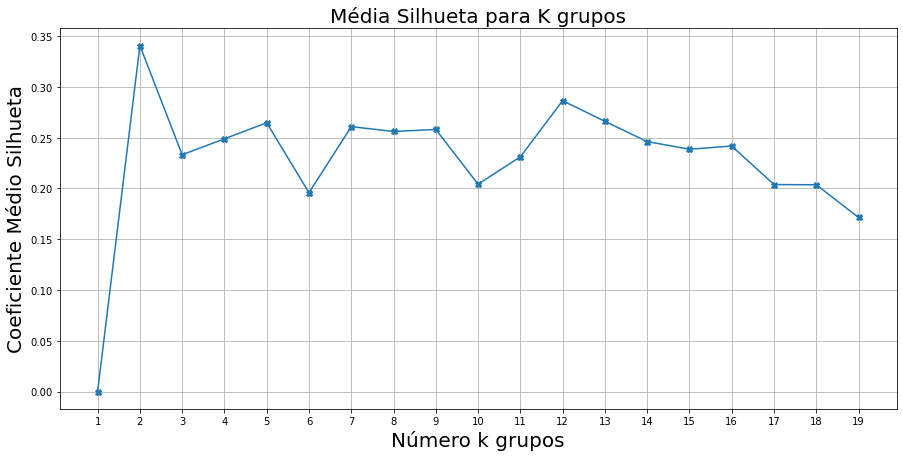

In [11]:

silhouetteK_medoids = []
silhouetteK_medoids.append((1,float(0),))
for i in range(2,20):
    
    

    kmedoids_new = KMedoids(n_clusters=i, metric = 'l2',  max_iter = 3000, init = 'k-medoids++').fit(std_data)
    cluster_labels_kMedoids = kmedoids_new.labels_
        
    # calculate silhoeutte score
    score_sillhoute = silhouette_score(std_data, cluster_labels_kMedoids, metric='euclidean') 

    print('Número de Cluster: ',i,'- valor Coeficiente: ',score_sillhoute)
    silhouetteK_medoids.append((i,score_sillhoute,)) 
    #k_medoid_iteration=k_medoid_iteration+1

    
   #-------------------Gerar Gráfico k cluster k-medoids ---------------------# 
    
plt.figure(figsize=(15,7))    
plt.grid(True)
plt.title("Média Silhueta para K grupos",fontsize=20)
plt.xlabel("Número k grupos",fontsize=20)
plt.ylabel("Coeficiente Médio Silhueta",fontsize=20)

plt.plot( [str(w[0]) for w in silhouetteK_medoids],[w[1] for w in silhouetteK_medoids], marker="X")


### Aplicando k-medoids para k =2

In [12]:
medoids_new = KMedoids(n_clusters=2, metric = 'l2',  max_iter = 3000, init = 'k-medoids++').fit(std_data)
cluster_labels_kMedoids = medoids_new.labels_

print(silhouette_score(std_data, cluster_labels_kMedoids, metric='euclidean') )
cluster_labels_kMedoids

0.2666799680853026


array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [13]:
# Anotando os registros com seus respectivos Clusters

dados_Limpeza["clustersK-medoids"] = cluster_labels_kMedoids


## Plotar Gráfico Sazional

In [14]:
import numpy as np
separate_dataFrame = pd.DataFrame(dados_Limpeza.groupby("clustersK-medoids").aggregate("mean").unstack(1))


mes_ano = []
index_cluster_1 = []

cluster_1_concentracao = []
cluster_2_concentracao = []

for x in range(0,len(separate_dataFrame),2):
    mes_ano.append(separate_dataFrame.index[x][0])

for x in range(0, len(separate_dataFrame),2):
    index_cluster_1.append(x)
    cluster_1_concentracao.append(separate_dataFrame[0][x])
    
for x in range(0,len(separate_dataFrame),1):
    if x not in index_cluster_1:
        cluster_2_concentracao.append(separate_dataFrame[0][x])

newData= np.vstack([mes_ano,cluster_1_concentracao,cluster_2_concentracao])
new_dataFrame = pd.DataFrame(newData.T, columns=['mês_ano','cluster_1_concentracao','cluster_2_concentracao'])
new_dataFrame

,mês_ano,cluster_1_concentracao,cluster_2_concentracao
0,Jan_2020,11.7,7.5
1,Fev_2020,9.95,6.5
2,Mar_2020,11.925,8.75
3,Abr_2020,13.8,11.25
4,Mai_2020,17.425,13.625
5,Jun_2020,17.325,13.5
6,Jul_2020,19.3,14.5
7,Ago_2020,18.85,13.25
8,Set_2020,25.675,22.0
9,Out_2020,18.05,14.75


<AxesSubplot:xlabel='mês_ano'>

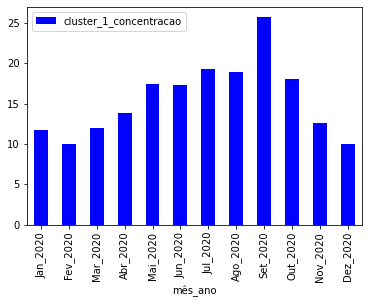

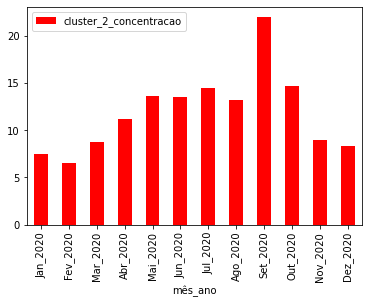

In [15]:
new_dataFrame['cluster_1_concentracao'] = new_dataFrame['cluster_1_concentracao'].astype('float')
new_dataFrame['cluster_2_concentracao'] = new_dataFrame['cluster_2_concentracao'].astype('float')

new_dataFrame.plot(kind='bar',x='mês_ano',y='cluster_1_concentracao', color = '#0000FF')
new_dataFrame.plot(kind='bar',x='mês_ano',y='cluster_2_concentracao', color = '#FF0000')

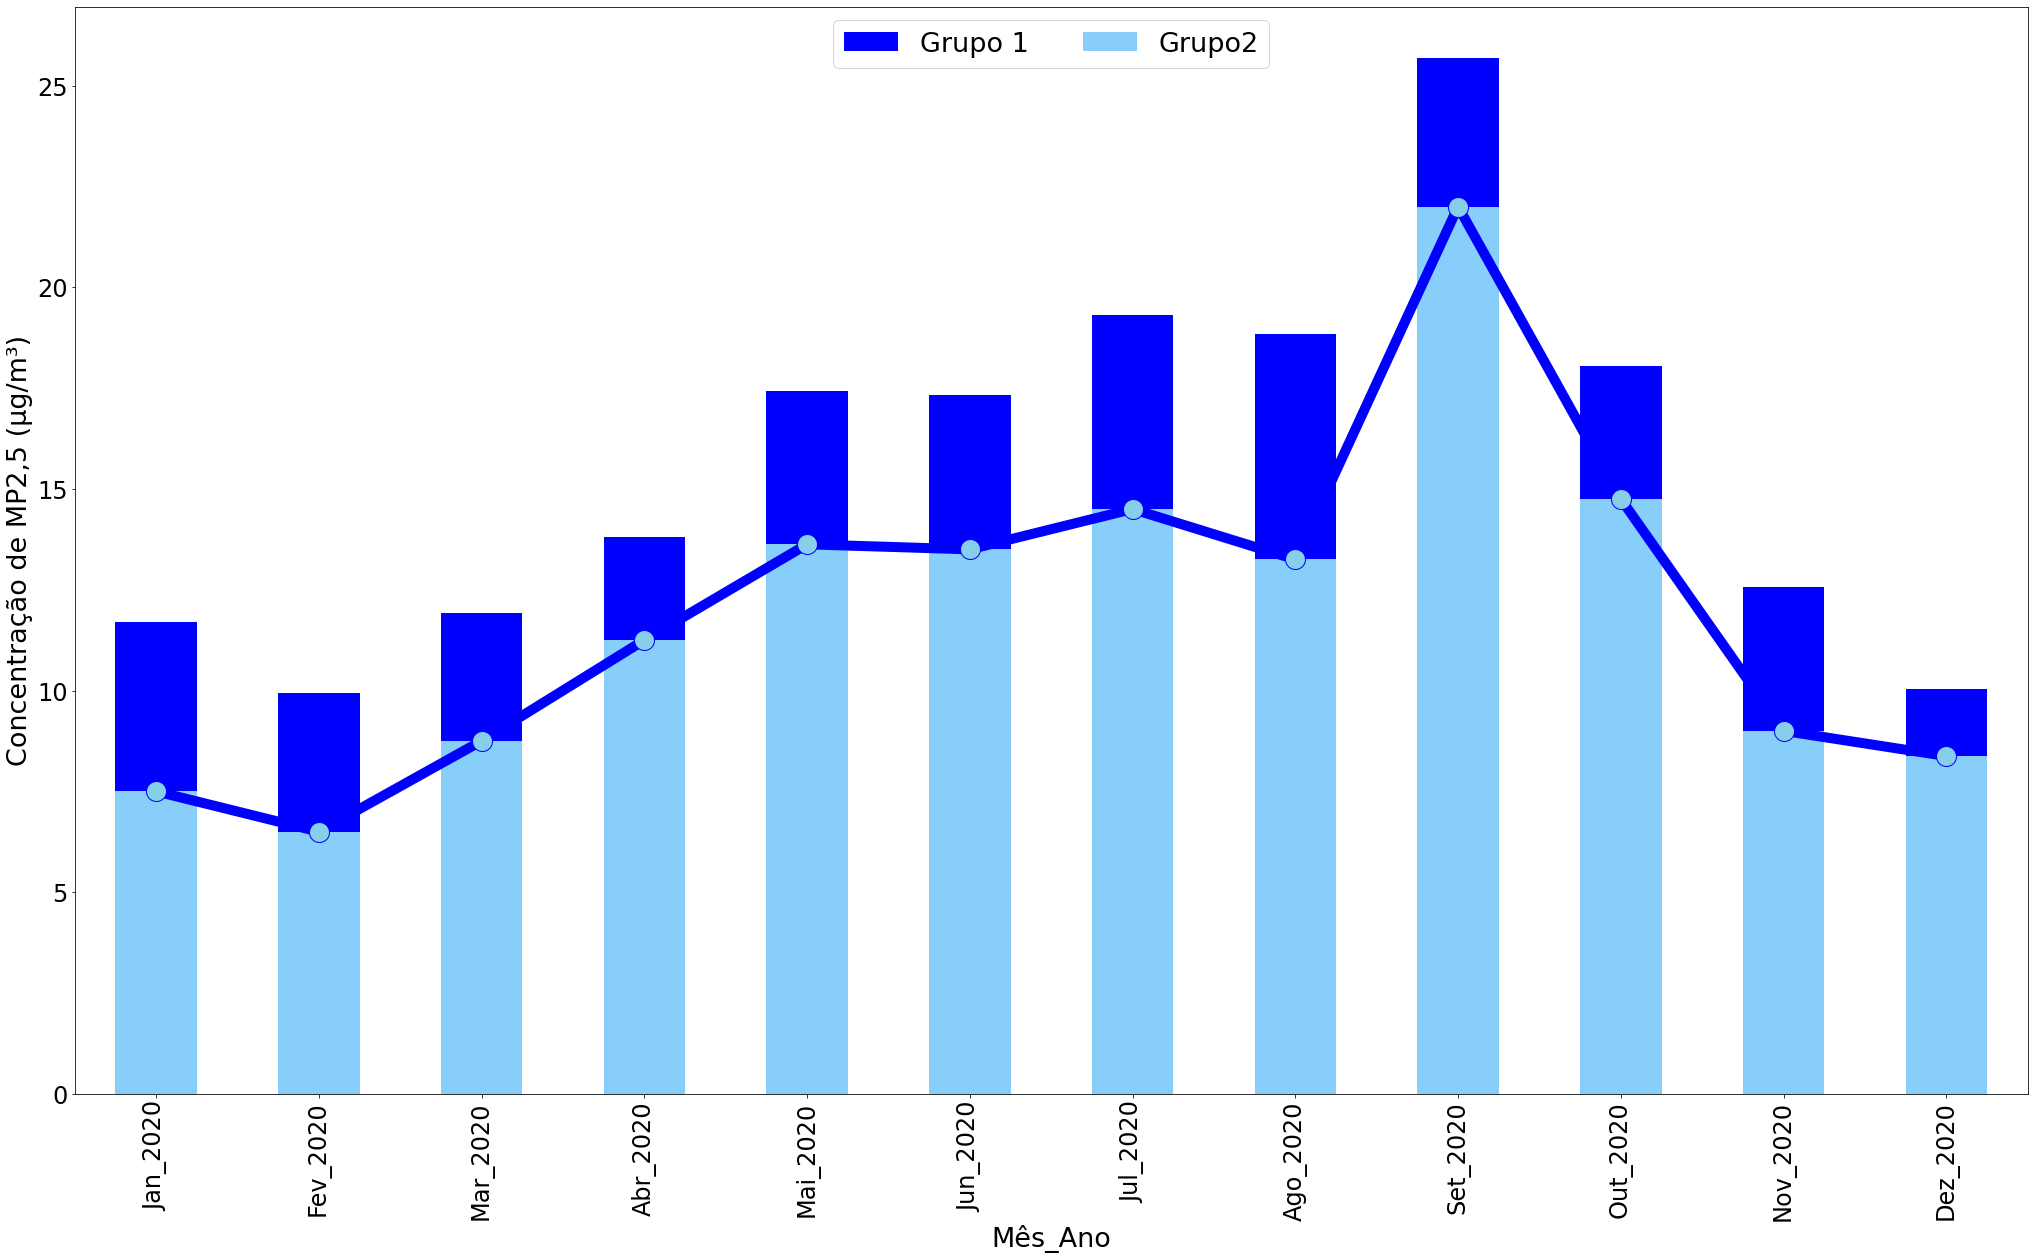

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
fig = plt.figure(figsize=(35, 45))
ax = plt.gca()
new_dataFrame['cluster_2_concentracao'].plot(legend=None,secondary_y=False,marker='o', markerfacecolor='skyblue', markersize=20, color='blue', linewidth=10, xlim=ax.get_xlim(),ax=ax)

#new_dataFrame['cluster_2_concentracao'].plot(legend=None,secondary_y=False,marker='o', markerfacecolor='skyblue', markersize=20, color='blue', linewidth=10, xlim=ax.get_xlim(),ax=ax)
new_dataFrame.plot(label='Grupo 1',kind='bar',x='mês_ano',y='cluster_1_concentracao', color = '#0000FF',figsize=(35, 20), fontsize = 24,ax=ax)


new_dataFrame.plot(label = 'Grupo2', kind='bar',x='mês_ano',y='cluster_2_concentracao', color = '#87CEFA',figsize=(35, 20), fontsize = 24, ax=ax)


#new_dataFrame.plot(kind='line',x='mês_ano',y='cluster_1_concentracao', color = '#000000',figsize=(35, 15), fontsize = 24,ax=ax)
#new_dataFrame.groupby(['cluster_1_concentracao']).mean().plot(kind='line', color = '#000000',figsize=(35, 15), fontsize = 24, ax=ax)
patches, labels = ax.get_legend_handles_labels()

ax.legend(patches[1:3], labels[1:3],loc='upper center',fontsize = 27, ncol=2)
ax.set_xlabel("Mês_Ano",fontsize = 27)
ax.set_ylabel("Concentração de MP2,5 (μg/m³)",fontsize = 27)

#plt.show()

fig.savefig('plotmp25_2020.png')


## Escrevendo em um arquivo os grupos do Mp2.5 

In [17]:
gravar_dados = dados
gravar_dados['clusters'] = dados_Limpeza["clustersK-medoids"]


for j in set(gravar_dados['clusters']):
    

    nome_arquivo='K-medoids-Grupo-'+str(j)+'-mp-2.5_2020.txt'
    
    arquivo = open(nome_arquivo, "w")
    
    cidades_grupo = gravar_dados.loc[gravar_dados["clusters"]==j]
    for cid in cidades_grupo['cidades']:
        
        arquivo.write('\n')
        arquivo.write(cid)
        
    arquivo.close()